# Distribuzione delle Euristiche

L'ordine che seguono le euristiche è il seguente:

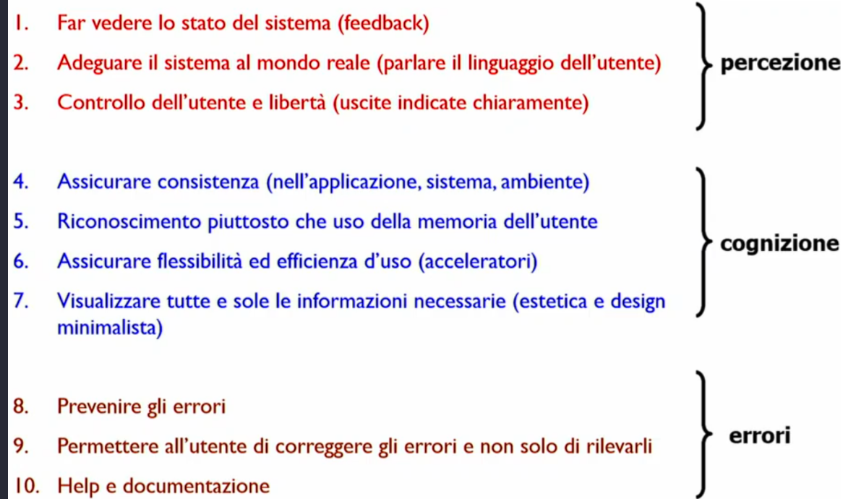

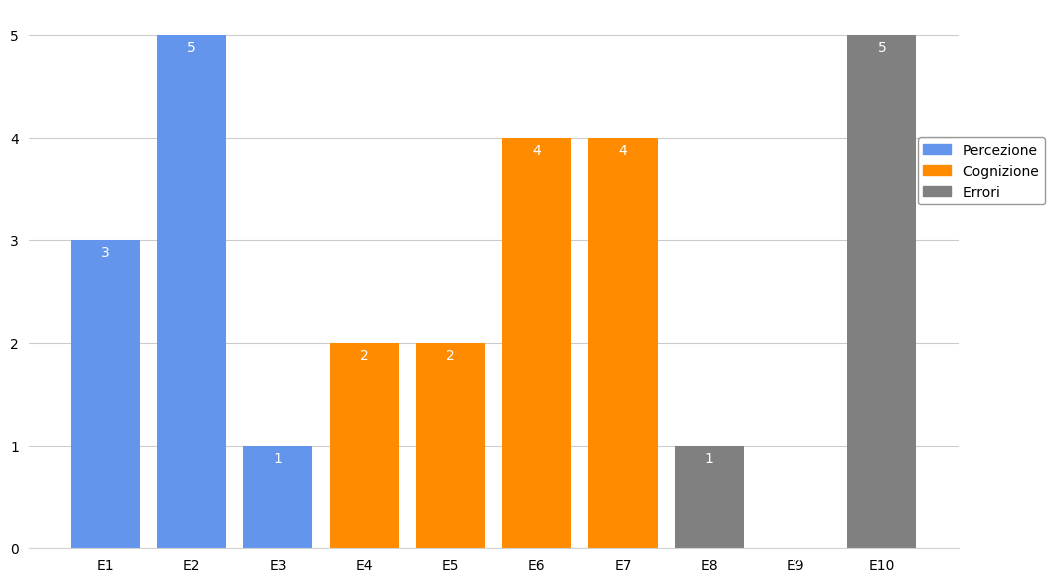

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

categorie = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10']

# MODIFICA I DATI QUA SOTTO PER CAMBIARE IL GRAFICO. Il valore 0 vuol dire che ci sono 0 euristiche violate nell'Euristica X
valori = [3, 5, 1, 2, 2, 4, 4, 1, 0, 5]

# Mettere i colori che volete, si possono mettere tutti uguali oppure divisi in categoria
percezione = 'cornflowerblue'
cognizione = 'darkorange'
errori = 'gray'

colori_barre = [percezione, percezione, percezione, cognizione, cognizione, cognizione, cognizione, errori, errori, errori]
fig, ax = plt.subplots(figsize=(12, 7))

# Imposta lo sfondo, scrivi dentro 'black' oppure 'silver'
fig.set_facecolor('white')
ax.set_facecolor('white')


bars = ax.bar(categorie, valori, color=colori_barre)
# Colore Numeri dentro le barre, se non si vedono mettere 'black' o 'silver'
ax.bar_label(bars, padding=-14, color='white', fontsize=10)

# Stile degli assi e della griglia
ax.yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.8)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('lightgray')
ax.tick_params(bottom=False, left=False)
percezione_patch = mpatches.Patch(color=percezione, label='Percezione')
cognizione_patch = mpatches.Patch(color=cognizione, label='Cognizione')
errori_patch = mpatches.Patch(color=errori, label='Errori')
leg = ax.legend(handles=[percezione_patch, cognizione_patch, errori_patch],
                loc='center right', bbox_to_anchor=(1.1, 0.7),
                facecolor='white', edgecolor='gray')
plt.show()

# matrice problemi valutatori

In [ ]:
import pandas as pd

# Mettere i dati corretti, non c'è bisogno di spiegare come metterli, ci si arriva da soli
data_raw = {
    "EU1": ["PB10", "PB18", "PB17"],
    "EU2": ["PB10", "PB1", "PB11", "PB13", "PB12", "PB14", "PB15"],
    "EU3": ["PB1", "PB2"],
    "ED2": ["PB11", "PB13", "PB18", "PB20"],
    "ED3": ["PB10", "PB2"],
    "ED1": ["PB10", "PB20", "PB1"]
}

records = []
for evaluator, problems_found in data_raw.items():
    for problem in problems_found:
        records.append({"evaluator": evaluator, "problem": problem, "found": 1})

df_long = pd.DataFrame(records)

problem_matrix = df_long.pivot_table(
    index="evaluator",
    columns="problem",
    values="found",
    fill_value=0
)

evaluator_problem_counts = problem_matrix.sum(axis=1)
sorted_evaluators = evaluator_problem_counts.sort_values(ascending=False).index
problem_matrix_sorted_rows = problem_matrix.loc[sorted_evaluators]
problem_occurrence_counts = problem_matrix_sorted_rows.sum(axis=0)
sorted_problems = problem_occurrence_counts.sort_values(ascending=False).index
final_matrix_float = problem_matrix_sorted_rows[sorted_problems]
final_matrix_int = final_matrix_float.astype(int)
print("Matrice Problemi/Valutatori Ordinata (valori interi):")
print(final_matrix_int)

Matrice Problemi/Valutatori Ordinata (valori interi):
problem    PB10  PB1  PB11  PB13  PB20  PB2  PB18  PB15  PB14  PB12  PB17
evaluator                                                                
EU2           1    1     1     1     0    0     0     1     1     1     0
ED2           0    0     1     1     1    0     1     0     0     0     0
ED1           1    1     0     0     1    0     0     0     0     0     0
EU1           1    0     0     0     0    0     1     0     0     0     1
ED3           1    0     0     0     0    1     0     0     0     0     0
EU3           0    1     0     0     0    1     0     0     0     0     0


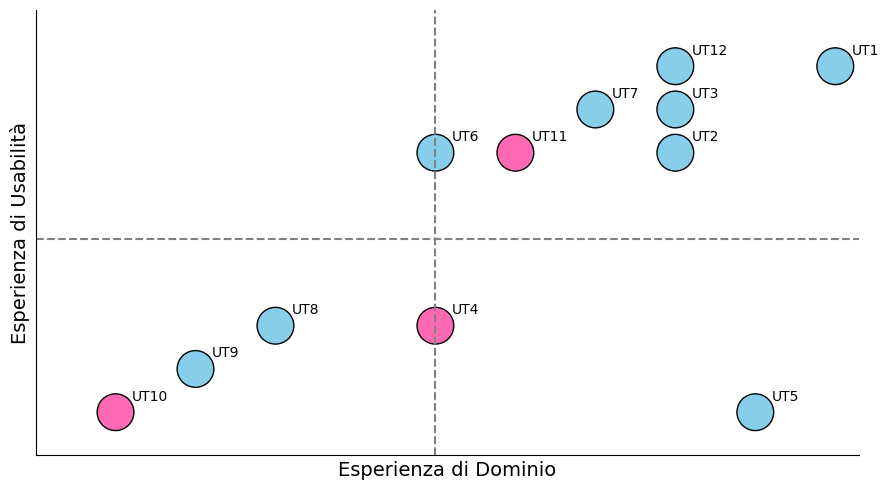

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supponiamo di avere dei punteggi per l'esperienza (es. da 1 a 10)

data = {'ID': ['UT1', 'UT2', 'UT3', 'UT4', 'UT5', 'UT6', 'UT7', 'UT8', 'UT9', 'UT10', 'UT11', 'UT12'],
        'Esperienza_Dominio': [10, 8, 8 , 5, 9, 5, 7, 3, 2, 1, 6, 8],
        'Esperienza_Usabilita': [9, 7, 8, 3, 1, 7, 8, 3, 2, 1, 7, 9]}


df = pd.DataFrame(data)
plt.figure(figsize=(9, 5))

# Metto i colori dei punti delle ragazze
color_map = {'UT10': 'hotpink', 'UT11': 'hotpink', 'UT4': 'hotpink'}

# Colori per tutti gli altri punti (ovvero i ragazzi)
colors = [color_map.get(id_val, 'skyblue') for id_val in df['ID']]

plt.scatter(df['Esperienza_Dominio'], df['Esperienza_Usabilita'],
            s=700,  # Dimensione dei punti
            c=colors,
            edgecolors='black', # Bordo dei punti
            alpha=1) # Trasparenza

for i, row in df.iterrows():
    plt.text(row['Esperienza_Dominio'] + 0.2, row['Esperienza_Usabilita'] + 0.2,
             row['ID'], fontsize=10, ha='left', va='bottom')

plt.axvline(x=5, color='grey', linestyle='--', linewidth=1.5)
plt.axhline(y=5, color='grey', linestyle='--', linewidth=1.5)
plt.xlabel("Esperienza di Dominio", fontsize=14)
plt.ylabel("Esperienza di Usabilità", fontsize=14)
plt.grid(False)
plt.xlim(0, 10.3)
plt.ylim(0, 10.3)
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.tight_layout()
plt.show()

# Statistiche Descrittive del Campione

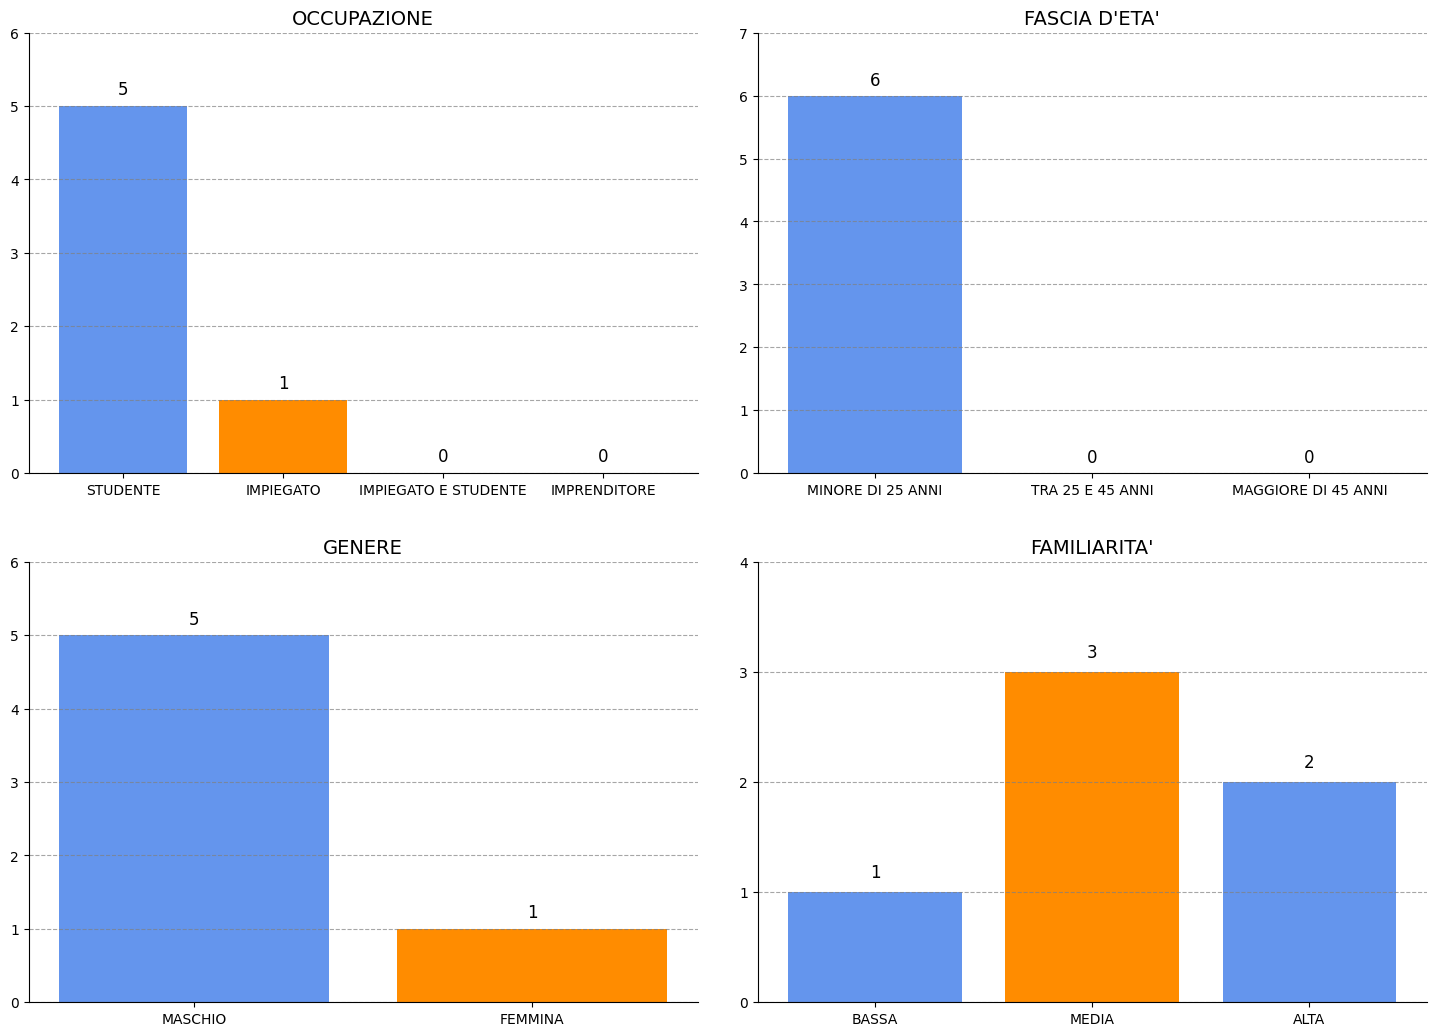

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Tutta la logica dei colori viene spostata qui dentro.
#    La funzione non ha più bisogno del parametro 'colore_barra'.
def crea_istogramma(ax, categorie, valori, titolo):
    ax.set_facecolor('white') # sfondo
    colori_barre = ['cornflowerblue', 'darkorange'] # colori delle barre
    lista_colori_da_usare = [colori_barre[i % len(colori_barre)] for i in range(len(valori))]
    bars = ax.bar(categorie, valori, color=lista_colori_da_usare)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval),
                ha='center', va='bottom', fontsize=12, color='black')
    ax.set_ylim(0, max(valori) + 1)
    ax.grid(axis='y', linestyle='--', alpha=0.7, color='grey')
    ax.set_yticks(np.arange(0, max(valori) + 2, 1))
    ax.set_title(titolo, fontsize=14, color='black') # colore titolo
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_edgecolor('black')
    ax.spines['left'].set_edgecolor('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
dati_grafici = [
    {
        "titolo": "OCCUPAZIONE",
        "categorie": ['STUDENTE', 'IMPIEGATO', 'IMPIEGATO E STUDENTE', 'IMPRENDITORE'],
        "valori": [5, 1, 0, 0]
    },
    {
        "titolo": "FASCIA D'ETA'",
        "categorie": ['MINORE DI 25 ANNI', 'TRA 25 E 45 ANNI', 'MAGGIORE DI 45 ANNI'],
        "valori": [6, 0, 0]
    },
    {
        "titolo": "GENERE",
        "categorie": ['MASCHIO', 'FEMMINA'],
        "valori": [5, 1]
    },
    {
        "titolo": "FAMILIARITA'",
        "categorie": ['BASSA', 'MEDIA', 'ALTA'],
        "valori": [1, 3, 2]
    }
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
fig.patch.set_facecolor('white') # sfondo
for ax, dati in zip(axes.flatten(), dati_grafici):
    crea_istogramma(ax, dati["categorie"], dati["valori"], dati["titolo"])
plt.tight_layout(pad=3.0)
plt.show()

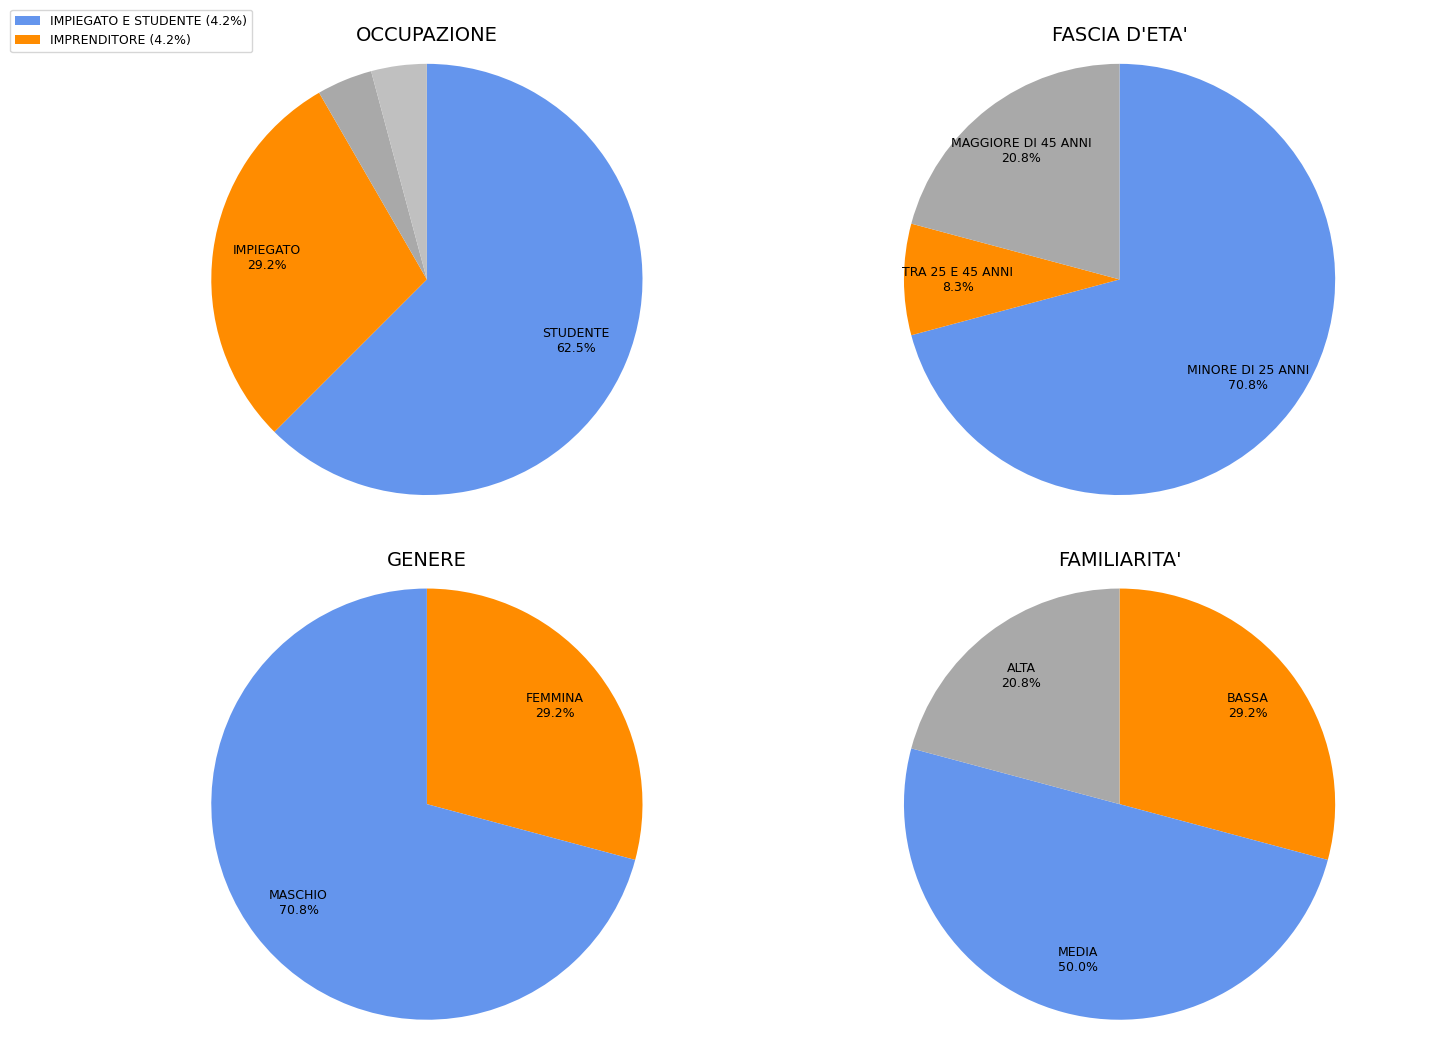

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def crea_grafico_torta(ax, labels, values, title, colors):
    total = sum(values)
    percentages = [(v / total) * 100 for v in values]
    plot_labels = [f"{label}\n{p:.1f}%" for label, p in zip(labels, percentages)]
    # Per le fette troppo piccole (< 6%), non mostrare l'etichetta per evitare confusione
    final_labels = [plot_labels[i] if percentages[i] >= 6 else '' for i in range(len(plot_labels))]
    ax.pie(
        percentages,
        labels=final_labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        labeldistance=0.75,
        textprops={'ha': 'center', 'fontsize': 9, 'color':'black'}
    )
    # Disegna il cerchio bianco al centro per l'effetto donut
    # center_circle = plt.Circle((0, 0), 0.55, color='white')
    # ax.add_artist(center_circle)
    legend_labels = [f"{l} ({p:.1f}%)" for l, p in zip(labels, percentages) if p < 6]
    if legend_labels:
        ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(-0.15, 1.1), fontsize=9)
    ax.set_title(title, fontsize=14, color='black') # Imposta il titolo e l'aspetto
    ax.axis('equal')  # Assicura che sia un cerchio

# --- Dati per i grafici ---
categorie_occupazione = ['STUDENTE', 'IMPIEGATO', 'IMPIEGATO E STUDENTE', 'IMPRENDITORE']
valori_occupazione = [15, 7, 1, 1]
colori_occupazione = ['cornflowerblue', 'darkorange', 'darkgrey', 'silver']

categorie_eta = ['MINORE DI 25 ANNI', 'TRA 25 E 45 ANNI', 'MAGGIORE DI 45 ANNI']
valori_eta = [17, 2, 5]
colori_eta = ['cornflowerblue', 'darkorange', 'darkgrey']

categorie_genere = ['FEMMINA', 'MASCHIO']
valori_genere = [7, 17]
colori_genere = ['darkorange', 'cornflowerblue']

categorie_fam = ['BASSA', 'MEDIA', 'ALTA']
valori_fam = [7, 12, 5]
colori_fam = ['darkorange', 'cornflowerblue', 'darkgrey']


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
fig.patch.set_facecolor('white') # colore sfondo
crea_grafico_torta(axes[0, 0], categorie_occupazione, valori_occupazione, "OCCUPAZIONE", colori_occupazione)
crea_grafico_torta(axes[0, 1], categorie_eta, valori_eta, "FASCIA D'ETA'", colori_eta)
crea_grafico_torta(axes[1, 0], categorie_genere, valori_genere, "GENERE", colors=colori_genere)
crea_grafico_torta(axes[1, 1], categorie_fam, valori_fam, "FAMILIARITA'", colors=colori_fam)
plt.tight_layout(pad=3.0)
plt.show()

---

# GRAFICO A BARRE - EFFICACIA

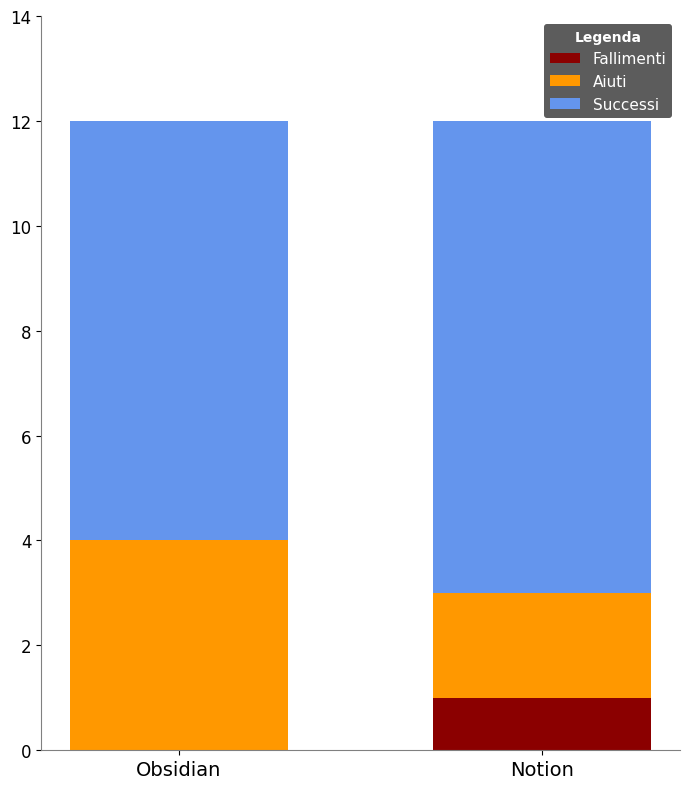

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- ESEMPIO DI DATI ---
# Sostituisci queste liste con i tuoi dati reali.
# 0 = Fallimento, 1 = Aiuto, 2 = Successo

# TASK 1 - V1
# [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
# [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# TASK 1 - V2
# [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
# [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# TASK 1 - V3
# [1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1]
# [2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2]

# TASK 2 - V1
# [2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2]
# [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]

# TASK 2 - V2
# [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
# [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# TASK 2 - V3
#  [2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1]
# [2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2]

# TASK 3 - V1
# [2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1]
# [2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1]

# TASK 3 - V2
# [2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1]
# [2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2]


obsidian_scores = [2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1]

notion_scores = [2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1]


# Etichette per le barre
labels = ['Obsidian', 'Notion']
all_scores = [obsidian_scores, notion_scores]

# Dizionario che mappa le etichette della legenda ai colori e ai dati
data_map = {
    'Successi': {'color': 'cornflowerblue', 'counts': np.array([s.count(2) for s in all_scores])},
    'Aiuti': {'color': '#ff9800', 'counts': np.array([s.count(1) for s in all_scores])},
    'Fallimenti': {'color': 'darkred', 'counts': np.array([s.count(0) for s in all_scores])}
}

# Impostazioni per lo stile del grafico (per assomigliare all'immagine)
fig, ax = plt.subplots(figsize=(7, 8)) # Aumentato leggermente la larghezza per la legenda
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

width = 0.6  # Larghezza delle barre
bottom = np.zeros(len(labels)) # Inizializza la base delle barre a zero

# Ciclo per creare i segmenti impilati di ogni barra
# Ordine inverso per avere i successi in alto
for label, data in reversed(list(data_map.items())):
    # Disegna un segmento della barra con l'etichetta corretta per la legenda
    p = ax.bar(labels, data['counts'], width, label=label, bottom=bottom, color=data['color'])

    # Aggiorna la base per il prossimo segmento da impilare
    bottom += data['counts']

# Personalizzazione del grafico
ax.set_ylabel('')
ax.set_title('')
ax.set_yticks(np.arange(0, max(bottom) + 3, 2))
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=12)

# Rimuovi i bordi superiore e destro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Cambia colore agli assi per renderli visibili
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# --- AGGIUNTA DELLA LEGENDA ---
# Crea la legenda con uno stile personalizzato per il tema scuro
legend = ax.legend(
    title='Legenda',
    facecolor='#333333',
    edgecolor='none',
    fontsize=11,
    loc='upper right'
)
# Imposta il colore del testo della legenda
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white', weight='bold')


plt.tight_layout() # Adatta il grafico per evitare sovrapposizioni
plt.show()

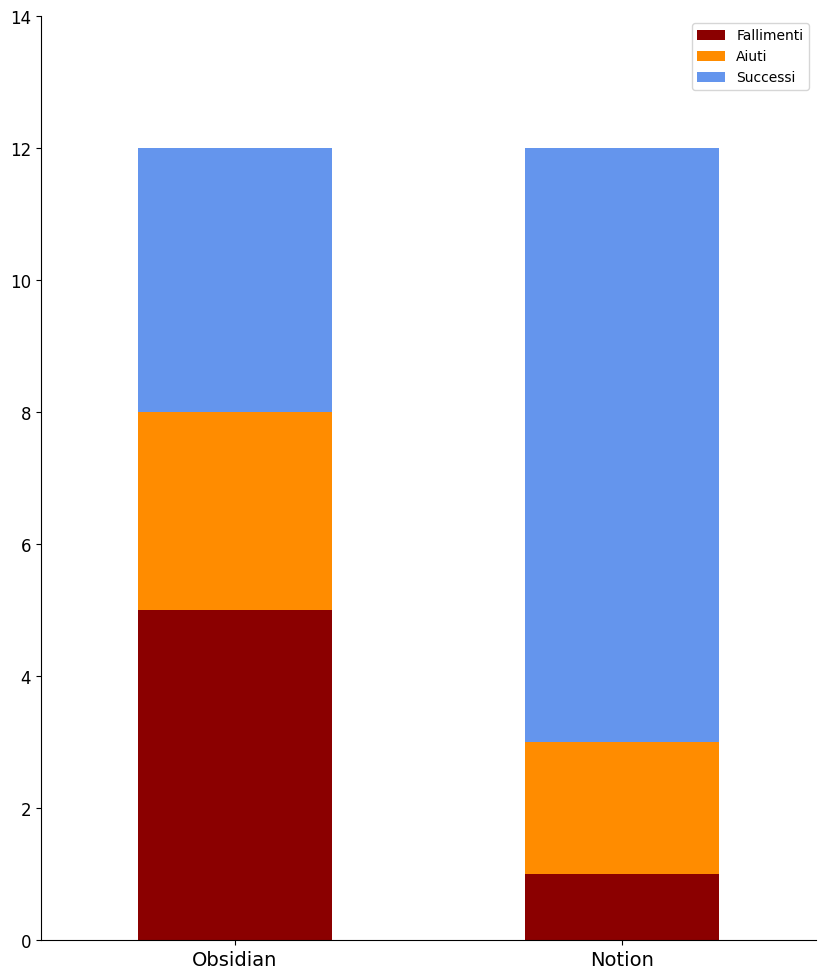

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fallimenti1 = 5
fallimenti2 = 1

aiuti1 = 3
aiuti2 = 2

data = {
    'Fallimenti': {'Obsidian': fallimenti1, 'Notion': fallimenti2},
    'Aiuti': {'Obsidian': aiuti1, 'Notion': aiuti2},
    'Successi': {'Obsidian': (12 - fallimenti1 - aiuti1), 'Notion': (12 - fallimenti2 - aiuti2)}
}

# Creazione del DataFrame pandas
df = pd.DataFrame(data)

# Colori specificati
colors = ['darkred', 'darkorange', 'cornflowerblue']

# Creazione del grafico a barre impilato
ax = df.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(10, 12) # Aumenta le dimensioni per una migliore leggibilità
)

# Rimozione delle linee del bordo superiore e destro per un look più pulito
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Impostazione dei limiti dell'asse y e dei tick
ax.set_ylim(0, 14)
ax.set_yticks(np.arange(0, 15, 2))

# Impostazione delle etichette e della rotazione dell'asse x
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)

# Salvataggio del grafico in un file
plt.savefig("grafico_generato.png")

# Mostra il grafico
plt.show()


# Test di Fisher
## questo codice va eseguito cambiano i valori, quelli per creare le barre non vanno bene
Tutti gli 1 diventano HELP, tutti i valori 2 diventano 1

Poi gli help decido se renderli tutti 1 (successi) oppure tutti 0 (fallimenti) oppure come ho fatto io, valuto caso per caso.

In [ ]:
# in questo caso ho considerato gli aiuti come dei fallimenti
# 1 - Successo    0 - Fallimento
# TASK X - Vx
# [...] valori di Obsidian
# [...] valori di Notion
# errori obsidian = X/12
# errori notion = X/12


#TASK 1 - V1
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#TASK 1 - V2
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#TASK 1 - V3
#[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]
#[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]

#TASK 2 - V1
#[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, X]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]

#TASK 2 - V2
#[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]

#TASK 2 - V3
#[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, X]
#[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, X]

#TASK 3 - V1
#[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, X]
#[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, X]

#TASK 3 - V2
#[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, X]
#[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, X]

In [ ]:
import numpy as np
from scipy import stats

# matrice di contingenza 2x2.

#           Successi | Fallimenti
# Gruppo 1      a     |      b
# Gruppo 2      c     |      d

# Calcoliamo i valori per la matrice:
successi_gruppo1 = 12
fallimenti_gruppo1 = 12 - successi_gruppo1  # 3

successi_gruppo2 = 12
fallimenti_gruppo2 = 12 - successi_gruppo2  # 6

# matrice di contingenza
table = np.array([
    [successi_gruppo1, fallimenti_gruppo1],
    [successi_gruppo2, fallimenti_gruppo2]
])


# test esatto di Fisher
oddsratio, p_value = stats.fisher_exact(table, alternative='two-sided')

# Interpretazione dei Risultati
alpha = 1/12

print("--- Risultati del Test Esatto di Fisher ---")
print(f"Matrice di Contingenza:\n{table}")
print(f"\nOdds Ratio: {oddsratio:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Soglia di significatività (alpha): {alpha:.4f}")

print("\n--- Interpretazione ---")

if p_value < alpha:
    print(f"✅ Conclusione: Dato che il p-value ({p_value:.4f}) è MINORE della soglia alpha ({alpha:.4f}), rifiutiamo l'ipotesi nulla.")
    print("C'è una differenza statisticamente significativa tra le proporzioni di successo dei due gruppi.")
else:
    print(f"❌ Conclusione: Dato che il p-value ({p_value:.4f}) NON è minore della soglia alpha ({alpha:.4f}), non possiamo rifiutare l'ipotesi nulla.")
    print("Non c'è evidenza sufficiente per concludere che esista una differenza statisticamente significativa tra i due gruppi.")



--- Risultati del Test Esatto di Fisher ---
Matrice di Contingenza:
[[12  0]
 [12  0]]

Odds Ratio: nan
P-value: 1.0000
Soglia di significatività (alpha): 0.0833

--- Interpretazione ---
❌ Conclusione: Dato che il p-value (1.0000) NON è minore della soglia alpha (0.0833), non possiamo rifiutare l'ipotesi nulla.
Non c'è evidenza sufficiente per concludere che esista una differenza statisticamente significativa tra i due gruppi.


In [ ]:
#TASK 1 - V1
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

#TASK 1 - V2
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]

#TASK 1 - V3
#[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, X]
#[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, X]

#TASK 2 - V1
#[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, X]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]

#TASK 2 - V2
#[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]
#[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, X]

#TASK 2 - V3
#[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, X]
#[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, X]

#TASK 3 - V1
#[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, X]
#[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, X]

#TASK 3 - V2
#[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, X]
#[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, X]


obsidian_scores = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

notion_scores = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


dfeff = pd.DataFrame({
    'Obsidian': obsidian_scores,
    'Notion': notion_scores
})

booking_mean = np.mean(dfeff['Obsidian'])
booking_std = np.std(dfeff['Obsidian'], ddof=1) # ddof=1 per dev. std. campionaria

airbnb_mean = np.mean(dfeff['Notion'])
airbnb_std = np.std(dfeff['Notion'], ddof=1)

print("\n--- Verifica Formato (Media +/- Deviazione Standard) ---")

print(f"Obsidian -> M = {booking_mean} +/- {booking_std}")
print(f"Notion      -> M = {airbnb_mean} +/- {airbnb_std}")
print("Questi valori corrispondono a quelli riportati nella slide.")
print("-" * 80)


--- Verifica Formato (Media +/- Deviazione Standard) ---
Obsidian -> M = 0.4166666666666667 +/- 0.5149286505444373
Notion      -> M = 0.5833333333333334 +/- 0.5149286505444373
Questi valori corrispondono a quelli riportati nella slide.
--------------------------------------------------------------------------------


# calcolo efficienza (tempi di esecuzione)

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np


# TASK 1 - V1
# ['00:03', '00:12', '00:33', '00:22', '00:07', '00:04', '00:05',  '00:12', '00:12', '00:40', '00:09', '00:09']
# ['00:06', '00:06', '00:12', '00:21', '00:25', '00:03', '00:05', '00:08', '01:16', '00:15', '00:10', '00:05']

# TASK 1 - V2
# ['00:06', '00:24', '00:57', '00:36', '00:11', '00:09', '00:07', '00:05', '00:53', '00:25', '00:08', '00:08']
# ['00:04', '00:08', '00:27', '00:55', '00:04', '00:48', '00:08', '00:11', '01:30', '01:15', '00:32', '00:09']

# TASK 1 - V3
# ['02:07', '00:18', '01:06', '00:48', '01:28', '00:20', '00:16', '00:41', '02:20', '01:10', '00:23', '01:30']
# ['00:16', '00:49', '00:27', '00:20', '00:37', '00:20', '00:15', '00:15', '02:18', '02:00', '00:41', '00:19']

# TASK 2 - V1
# ['00:14', '00:33', '00:23', '00:12', '00:36', '00:05', '00:12', '00:10', '00:15', '01:33', '00:10', '00:06']
# ['00:03', '00:24', '00:21', '00:09', '00:12', '00:08', '00:10', '00:13', '00:10', '00:26', '00:13', '00:26']

# TASK 2 - V2
# ['00:22', '00:52', '00:07', '00:12', '00:31', '00:07', '00:08', '00:07', '00:18', '00:31', '00:22', '00:16']
# ['00:05', '00:03', '00:04', '00:06', '00:22', '00:38', '00:16', '00:08', '00:25', '00:25', '00:05', '00:11']

# TASK 2 - V3
# ['03:07', '01:30', '04:08', '00:57', '02:23', '00:23', '01:01', '00:30', '02:20', '02:21', '01:33', '01:30']
# ['00:20', '00:21', '00:07', '00:16', '00:22', '00:14', '00:09', '00:14', '00:30', '00:53', '00:04', '00:14']

# TASK 3 - V1
# ['00:33', '01:18', '00:20', '00:41', '00:50', '00:50', '02:51', '02:40', '01:24', '01:20', '02:31', '01:28']
# ['00:40', '00:55', '01:29', '00:37', '01:03', '01:26', '01:50', '01:25', '01:00', '00:38', '01:00', '01:05']

# TASK 3 - V2
# ['01:27', '01:31', '02:05', '01:22', '00:30', '01:08', '00:46', '00:58', '02:20', '01:21', '00:48', '01:15']
# ['00:26', '01:04', '00:26', '00:56', '01:47', '00:24', '00:23', '01:30', '00:28', '01:30', '04:10', '00:07']


# tutto obsidian
# ['00:03', '00:12', '00:33', '00:22', '00:07', '00:04', '00:05', '00:12', '00:12', '00:40', '00:09', '00:09', '00:06', '00:24', '00:57', '00:36', '00:11', '00:09', '00:07', '00:05', '00:53', '00:25', '00:08', '00:08', '02:07', '00:18', '01:06', '00:48', '01:28', '00:20', '00:16', '00:41', '02:20', '01:10', '00:23', '01:30', '00:14', '00:33', '00:23', '00:12', '00:36', '00:05', '00:12', '00:10', '00:15', '01:33', '00:10', '00:06', '00:22', '00:52', '00:07', '00:12', '00:31', '00:07', '00:08', '00:07', '00:18', '00:31', '00:22', '00:16', '03:07', '01:30', '04:08', '00:57', '02:23', '00:23', '01:01', '00:30', '02:20', '02:21', '01:33', '01:30', '00:33', '01:18', '00:20', '00:41', '00:50', '00:50', '02:51', '02:40', '01:24', '01:20', '02:31', '01:28', '01:27', '01:31', '02:05', '01:22', '00:30', '01:08', '00:46', '00:58', '02:20', '01:21', '00:48', '01:15']
# tutto notion
# ['00:06', '00:06', '00:12', '00:21', '00:25', '00:03', '00:05', '00:08', '01:16', '00:15', '00:10', '00:05', '00:04', '00:08', '00:27', '00:55', '00:04', '00:48', '00:08', '00:11', '01:30', '01:15', '00:32', '00:09', '00:16', '00:49', '00:27', '00:20', '00:37', '00:20', '00:15', '00:15', '02:18', '02:00', '00:41', '00:19', '00:03', '00:24', '00:21', '00:09', '00:12', '00:08', '00:10', '00:13', '00:10', '00:26', '00:13', '00:26', '00:05', '00:03', '00:04', '00:06', '00:22', '00:38', '00:16', '00:08', '00:25', '00:25', '00:05', '00:11', '00:20', '00:21', '00:07', '00:16', '00:22', '00:14', '00:09', '00:14', '00:30', '00:53', '00:04', '00:14', '00:40', '00:55', '01:29', '00:37', '01:03', '01:26', '01:50', '01:25', '01:00', '00:38', '01:00', '01:05', '00:26', '01:04', '00:26', '00:56', '01:47', '00:24', '00:23', '01:30', '00:28', '01:30', '04:10', '00:07']




booking_times_str = ['00:03', '00:12', '00:33', '00:22', '00:07', '00:04', '00:05', '00:12', '00:12', '00:40', '00:09', '00:09', '00:06', '00:24', '00:57', '00:36', '00:11', '00:09', '00:07', '00:05', '00:53', '00:25', '00:08', '00:08', '02:07', '00:18', '01:06', '00:48', '01:28', '00:20', '00:16', '00:41', '02:20', '01:10', '00:23', '01:30', '00:14', '00:33', '00:23', '00:12', '00:36', '00:05', '00:12', '00:10', '00:15', '01:33', '00:10', '00:06', '00:22', '00:52', '00:07', '00:12', '00:31', '00:07', '00:08', '00:07', '00:18', '00:31', '00:22', '00:16', '03:07', '01:30', '04:08', '00:57', '02:23', '00:23', '01:01', '00:30', '02:20', '02:21', '01:33', '01:30', '00:33', '01:18', '00:20', '00:41', '00:50', '00:50', '02:51', '02:40', '01:24', '01:20', '02:31', '01:28', '01:27', '01:31', '02:05', '01:22', '00:30', '01:08', '00:46', '00:58', '02:20', '01:21', '00:48', '01:15']
airbnb_times_str = ['00:06', '00:06', '00:12', '00:21', '00:25', '00:03', '00:05', '00:08', '01:16', '00:15', '00:10', '00:05', '00:04', '00:08', '00:27', '00:55', '00:04', '00:48', '00:08', '00:11', '01:30', '01:15', '00:32', '00:09', '00:16', '00:49', '00:27', '00:20', '00:37', '00:20', '00:15', '00:15', '02:18', '02:00', '00:41', '00:19', '00:03', '00:24', '00:21', '00:09', '00:12', '00:08', '00:10', '00:13', '00:10', '00:26', '00:13', '00:26', '00:05', '00:03', '00:04', '00:06', '00:22', '00:38', '00:16', '00:08', '00:25', '00:25', '00:05', '00:11', '00:20', '00:21', '00:07', '00:16', '00:22', '00:14', '00:09', '00:14', '00:30', '00:53', '00:04', '00:14', '00:40', '00:55', '01:29', '00:37', '01:03', '01:26', '01:50', '01:25', '01:00', '00:38', '01:00', '01:05', '00:26', '01:04', '00:26', '00:56', '01:47', '00:24', '00:23', '01:30', '00:28', '01:30', '04:10', '00:07']

# Funzione ausiliaria per convertire il formato 'MM:SS' in secondi totali
def to_seconds(time_str):
    """Converte una stringa di tempo 'MM:SS' nel numero totale di secondi."""
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Funzione ausiliaria per convertire i secondi nel formato 'MM:SS'
def to_min_sec(total_seconds):
    """Converte i secondi totali in una stringa di tempo formattata 'MM:SS'."""
    minutes = int(total_seconds // 60)
    seconds = int(total_seconds % 60)
    return f"{minutes:02d}:{seconds:02d}"


booking_seconds = [to_seconds(t) for t in booking_times_str]
airbnb_seconds = [to_seconds(t) for t in airbnb_times_str]

df = pd.DataFrame({
    'Obsidian': booking_seconds,
    'Notion': airbnb_seconds
})

print("--- Dati dei 12 Partecipanti (in secondi) ---")
print(df)
print("-" * 45)


# Calcolo delle Statistiche Descrittive
# Calcoliamo media e deviazione standard per verificare i valori della slide
booking_mean_sec = np.mean(df['Obsidian'])
booking_std_sec = np.std(df['Obsidian'], ddof=1)

airbnb_mean_sec = np.mean(df['Notion'])
airbnb_std_sec = np.std(df['Notion'], ddof=1)

print("\n--- Statistiche Descrittive (Verifica) ---")
print(f"Obsidian -> Media: {booking_mean_sec:.2f} sec ({to_min_sec(booking_mean_sec)}) | Dev. Std: {booking_std_sec:.2f} sec ({to_min_sec(booking_std_sec)})")
print(f"Notion      -> Media: {airbnb_mean_sec:.2f} sec ({to_min_sec(airbnb_mean_sec)}) | Dev. Std: {airbnb_std_sec:.2f} sec ({to_min_sec(airbnb_std_sec)})")
print("-" * 45)


# Esecuzione del T-Test per Campioni Dipendenti
# Usiamo stats.ttest_rel perché i dati sono "accoppiati"
t_statistic, p_value = stats.ttest_rel(df['Obsidian'], df['Notion'])

print("\n--- Risultati del T-Test per Campioni Dipendenti ---")
print(f"Statistica t: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Livello di significatività
print("\n--- Interpretazione ---")
print(f"Il t-statistic calcolato ({t_statistic:.3f}), arrotondato a due cifre decimali, è {t_statistic:.2f}.")
print(f"Il p-value calcolato ({p_value:.4f}) è superiore/inferiore a 0.05.")

if p_value < alpha:
    print(f"\n✅ Conclusione: Dato che p ({p_value:.4f}) è minore di {alpha}, la differenza è statisticamente significativa.")
    print("Gli utenti impiegano significativamente più tempo su Obsidian rispetto ad Notion.")
else:
    print(f"\n❌ Conclusione: Dato che p ({p_value:.4f}) non è minore di {alpha}, non c'è una differenza statisticamente significativa.")

--- Dati dei 12 Partecipanti (in secondi) ---
    Obsidian  Notion
0          3       6
1         12       6
2         33      12
3         22      21
4          7      25
..       ...     ...
91        58      90
92       140      28
93        81      90
94        48     250
95        75       7

[96 rows x 2 columns]
---------------------------------------------

--- Statistiche Descrittive (Verifica) ---
Obsidian -> Media: 51.10 sec (00:51) | Dev. Std: 49.58 sec (00:49)
Notion      -> Media: 33.60 sec (00:33) | Dev. Std: 37.40 sec (00:37)
---------------------------------------------

--- Risultati del T-Test per Campioni Dipendenti ---
Statistica t: 3.1939
P-value: 0.0019

--- Interpretazione ---
Il t-statistic calcolato (3.194), arrotondato a due cifre decimali, è 3.19.
Il p-value calcolato (0.0019) è superiore/inferiore a 0.05.

✅ Conclusione: Dato che p (0.0019) è minore di 0.05, la differenza è statisticamente significativa.
Gli utenti impiegano significativamente più tempo su 

# Possiamo applicare il T-Test?
La risposta la dà il Test di Shapiro-Wilk, che verifica se i tempi di esecuzione seguono una distribuzione normale. Se lo fanno applichiamo il T-Test, se non lo fanno applichiamo il T-Test lo stesso (bruh)

--- Test di Shapiro-Wilk (sulle Differenze) ---
Statistica W: 0.7649
P-value: 0.0038

--- Interpretazione del Test di Shapiro-Wilk ---
Conclusione Shapiro-Wilk: Dato che p (0.0038) è minore di 0.05, rifiutiamo l'ipotesi nulla.
❌Le differenze *non* sembrano essere distribuite normalmente.
Attenzione: L'assunzione di normalità per il t-test accoppiato potrebbe non essere soddisfatta. Potrebbe essere necessario considerare test non parametrici (es. Wilcoxon Signed-Rank Test) o verificare la robustezza del t-test per la dimensione del campione.

--- Ispezione Visiva con Q-Q Plot ---


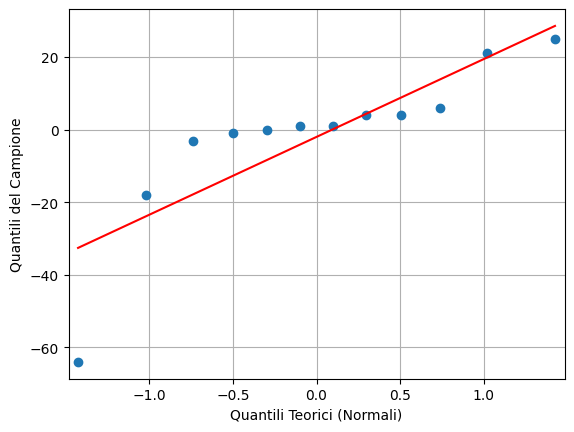

Interpretazione del Q-Q Plot:
Se i punti blu seguono da vicino la linea rossa, i dati sono probabilmente normali.
Se i punti deviano sistematicamente dalla linea (specialmente alle code), i dati non sono normali.


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm # Spesso usato per Q-Q plot più dettagliati

# Task 1 - S1
x = ['00:03', '00:12', '00:33', '00:22', '00:07', '00:04', '00:05',  '00:12', '00:12', '00:40', '00:09', '00:09']
y = ['00:06', '00:06', '00:12', '00:21', '00:25', '00:03', '00:05', '00:08', '01:16', '00:15', '00:10', '00:05']


# TASK 2 - S1
#x = ['00:14', '00:33', '00:23', '00:12', '00:36', '00:05', '00:12', '00:10', '00:15', '01:33', '00:10', '00:06']
#y = ['00:03', '00:24', '00:21', '00:09', '00:12', '00:08', '00:10', '00:13', '00:10', '00:26', '00:13', '00:26']

x_seconds = [to_seconds(t) for t in x]
y_seconds = [to_seconds(t) for t in y]

df = pd.DataFrame({
    'Obsidian': x_seconds,
    'Notion': y_seconds
})


# Calcola le differenze tra le coppie di osservazioni
differences = df['Obsidian'] - df['Notion']

# Esegue il test di Shapiro-Wilk sulle differenze
shapiro_stat, shapiro_p_value = stats.shapiro(differences)

print("--- Test di Shapiro-Wilk (sulle Differenze) ---")
print(f"Statistica W: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p_value:.4f}")

# Interpretazione del Test di Shapiro-Wilk
alpha_shapiro = 0.05 # Livello di significatività per il test di normalità

print("\n--- Interpretazione del Test di Shapiro-Wilk ---")
if shapiro_p_value < alpha_shapiro:
    print(f"Conclusione Shapiro-Wilk: Dato che p ({shapiro_p_value:.4f}) è minore di {alpha_shapiro}, rifiutiamo l'ipotesi nulla.")
    print("❌Le differenze *non* sembrano essere distribuite normalmente.")
    print("Attenzione: L'assunzione di normalità per il t-test accoppiato potrebbe non essere soddisfatta. Potrebbe essere necessario considerare test non parametrici (es. Wilcoxon Signed-Rank Test) o verificare la robustezza del t-test per la dimensione del campione.")
else:
    print(f"Conclusione Shapiro-Wilk: Dato che p ({shapiro_p_value:.4f}) non è minore di {alpha_shapiro}, non abbiamo sufficiente evidenza per rifiutare l'ipotesi nulla.")
    print("✅ Le differenze *possono essere considerate* distribuite normalmente.")
    print("L'assunzione di normalità per il t-test accoppiato può essere soddisfatta.")


# Q-Q Plot per ispezione visiva
print("\n--- Ispezione Visiva con Q-Q Plot ---")

fig = sm.qqplot(differences, line='s') # 's' sta per 'standardized line'
plt.xlabel("Quantili Teorici (Normali)")
plt.ylabel("Quantili del Campione")
plt.grid(True)
plt.show()

print("Interpretazione del Q-Q Plot:")
print("Se i punti blu seguono da vicino la linea rossa, i dati sono probabilmente normali.")
print("Se i punti deviano sistematicamente dalla linea (specialmente alle code), i dati non sono normali.")

# Violin Plot

<ipython-input-28-2015195978>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stats_table_formatted = stats_table.applymap(to_min_sec)
<ipython-input-28-2015195978>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


--- Tabella delle Statistiche Descrittive ---
         Baffo inferiore Primo quartile Mediana Terzo quartile  \
Obsidian           00:30          00:55   01:18          01:28   
Notion             00:07          00:25   00:42          01:30   

         Baffo superiore  Media  
Obsidian           02:20  01:17  
Notion             04:10  01:05  
--------------------------------------------------------------------------------


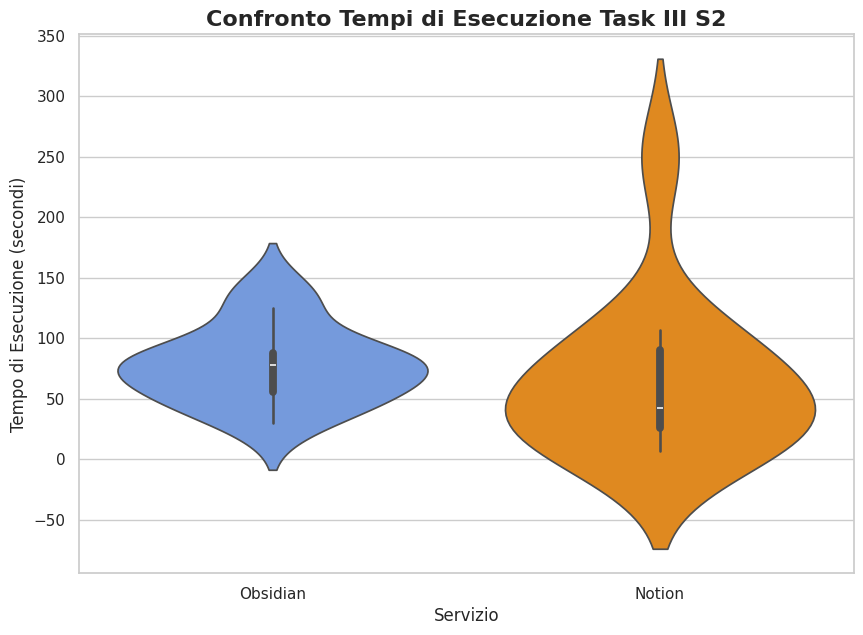

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# --- 2. Calcolo delle Statistiche Descrittive ---
# Usa describe() per ottenere facilmente media, quartili, min e max
stats_desc = df.describe().transpose()

# Rinomina le colonne per chiarezza
stats_desc = stats_desc.rename(columns={
    'min': 'Baffo inferiore',
    '25%': 'Primo quartile',
    '50%': 'Mediana',
    '75%': 'Terzo quartile',
    'max': 'Baffo superiore',
    'mean': 'Media'
})

# Seleziona e riordina le colonne per farle corrispondere alla tabella dell'immagine
stats_table = stats_desc[[
    'Baffo inferiore', 'Primo quartile', 'Mediana',
    'Terzo quartile', 'Baffo superiore', 'Media'
]]

# Applica la formattazione MM:SS a tutte le colonne
stats_table_formatted = stats_table.applymap(to_min_sec)

print("--- Tabella delle Statistiche Descrittive ---")
print(stats_table_formatted)
print("-" * 80)



# Per il plot, è meglio avere i dati in formato "long"
df_long = df.melt(var_name='Servizio', value_name='Tempo (secondi)')

# Imposta lo stile del grafico
sns.set_theme(style="whitegrid")

# Crea la figura e l'asse per il plot
plt.figure(figsize=(10, 7))
ax = sns.violinplot(
    x='Servizio',
    y='Tempo (secondi)',
    data=df_long,
    palette={'Obsidian': 'cornflowerblue', 'Notion': 'darkorange'},
    inner='box' # Mostra un box plot all'interno del violino
)

ax.set_title('Confronto Tempi di Esecuzione Task III S2', fontsize=16, weight='bold')
ax.set_ylabel('Tempo di Esecuzione (secondi)', fontsize=12)
plt.show()

# Barre raggruppate

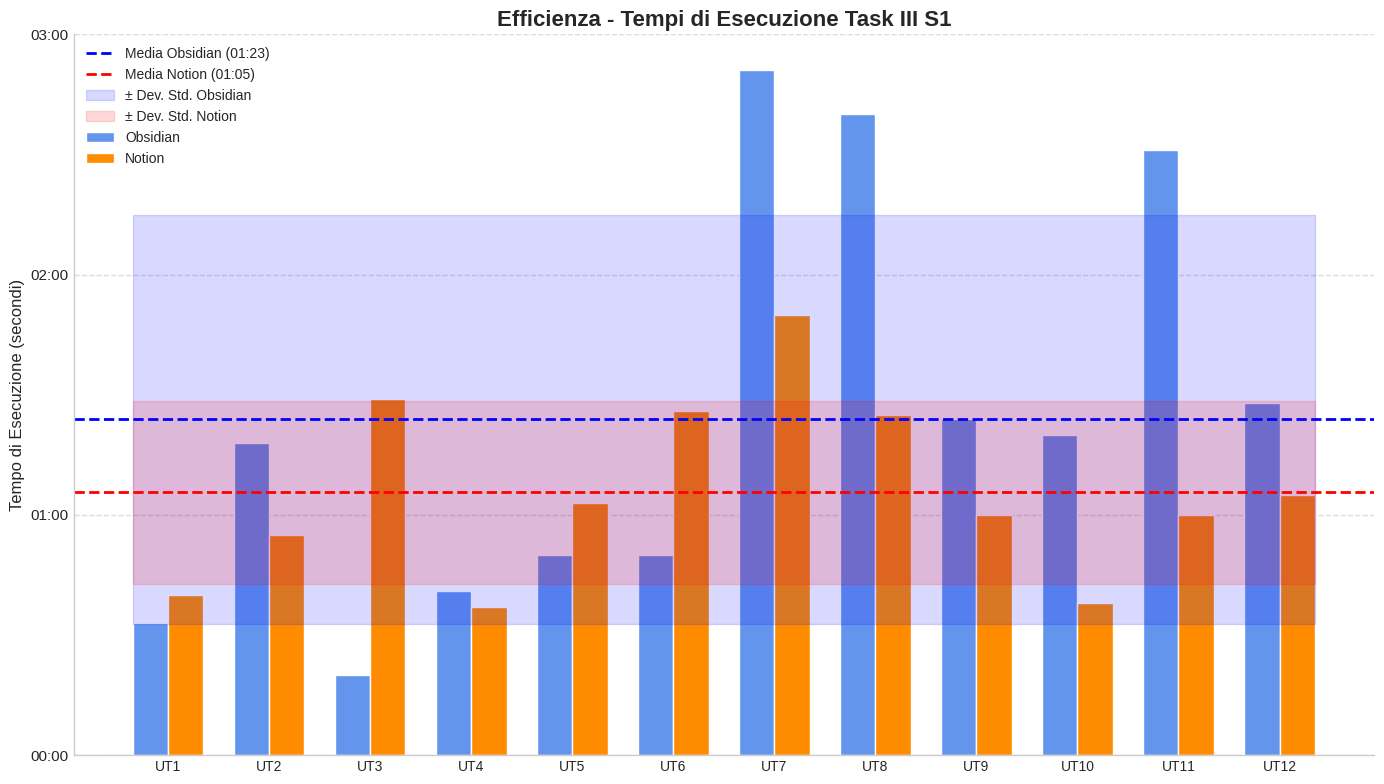

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Dati di Esempio e Funzioni di Supporto ---

# Definizione della funzione per convertire secondi in formato MM:SS
def to_min_sec(seconds):
    """Converte un totale di secondi in una stringa formato MM:SS."""
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes:02d}:{secs:02d}"

# --- Grafico a Barre Raggruppate con Linee di Media e Deviazione Standard ---

# Imposta la figura e gli assi
plt.style.use('seaborn-v0_8-whitegrid') # Stile per un aspetto più pulito
plt.figure(figsize=(14, 8))
ax = plt.gca() # Ottieni l'asse corrente

# Definisci le posizioni delle barre sull'asse x
bar_width = 0.35 # Larghezza delle barre
indices = np.arange(len(df)) # Posizioni centrali per ogni gruppo (partecipante)

# Crea le barre raggruppate
bars_booking = ax.bar(indices - bar_width/2, df['Obsidian'], bar_width, label='Obsidian', color='cornflowerblue')
bars_airbnb = ax.bar(indices + bar_width/2, df['Notion'], bar_width, label='Notion', color='darkorange')

# Calcola media e deviazione standard
booking_mean = np.mean(df['Obsidian'])
booking_std = np.std(df['Obsidian'], ddof=1) # ddof=1 per la deviazione standard campionaria
airbnb_mean = np.mean(df['Notion'])
airbnb_std = np.std(df['Notion'], ddof=1)

# Aggiungi le linee per la media
ax.axhline(booking_mean, color='blue', linestyle='--', linewidth=2, label=f'Media Obsidian ({to_min_sec(booking_mean)})')
ax.axhline(airbnb_mean, color='red', linestyle='--', linewidth=2, label=f'Media Notion ({to_min_sec(airbnb_mean)})')

# Aggiungi le fasce per la deviazione standard
ax.fill_between(
    x=[-bar_width, indices[-1] + bar_width], # Estendi la fascia sull'intera larghezza
    y1=booking_mean - booking_std,
    y2=booking_mean + booking_std,
    color='blue',
    alpha=0.15, # Trasparenza della fascia
    label='± Dev. Std. Obsidian'
)

ax.fill_between(
    x=[-bar_width, indices[-1] + bar_width], # Estendi la fascia sull'intera larghezza
    y1=airbnb_mean - airbnb_std,
    y2=airbnb_mean + airbnb_std,
    color='red',
    alpha=0.15, # Trasparenza della fascia
    label='± Dev. Std. Notion'
)


ax.set_ylabel('Tempo di Esecuzione (secondi)', fontsize=12)
ax.set_title('Efficienza - Tempi di Esecuzione Task III S1', fontsize=16, fontweight='bold')
ax.set_xticks(indices) # Imposta i tick x alle posizioni centrali dei gruppi
ax.set_xticklabels([f'UT{i+1}' for i in indices], fontsize=10) # Etichette per i partecipanti

y_max = max(df['Obsidian'].max(), df['Notion'].max()) # Trova il valore massimo per l'asse Y
# Crea tick ogni 60 secondi (1 minuto)
y_ticks_seconds = np.arange(0, y_max + 60, 60)
y_tick_labels = [to_min_sec(t) for t in y_ticks_seconds]
ax.set_yticks(y_ticks_seconds)
ax.set_yticklabels(y_tick_labels)

ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7) # Rimuove la griglia sull'asse x per pulizia
ax.grid(axis='x', linestyle='', alpha=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.tight_layout() # Adatta il layout
plt.show()

# UEQ - Grafico

DataFrame:
             Scale  Mean  Std. Dev.   N  Confidence  I.C. (α = .05) Min  \
0     ATTRATTIVITÀ 0.653      1.089  24       0.436               0.217   
1   APPRENDIBILITÀ 0.625      1.365  24       0.546               0.079   
2       EFFICIENZA 0.490      1.105  24       0.442               0.048   
3  CONTROLLABILITÀ 0.646      0.853  24       0.341               0.305   
4     STIMOLAZIONE 0.208      0.611  24       0.244              -0.036   
5      ORIGINALITÀ 0.208      1.107  24       0.443              -0.235   

   I.C. (α = .05) Max  
0               1.088  
1               1.171  
2               0.931  
3               0.987  
4               0.453  
5               0.651  


/tmp/ipython-input-17-3704451816.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Scale'], rotation=45, ha="right")


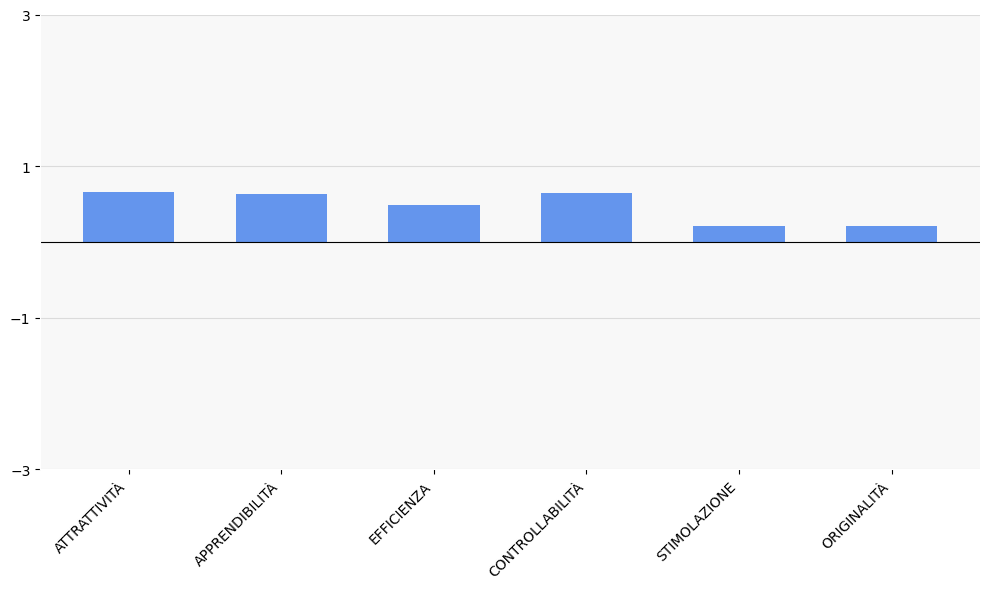


Tabella formattata (come DataFrame):
          Scale  Mean  Std. Dev.  N  Confidence  I.C. (α = .05)
   ATTRATTIVITÀ 0.653      1.089 24       0.436  [0.217, 1.088]
 APPRENDIBILITÀ 0.625      1.365 24       0.546  [0.079, 1.171]
     EFFICIENZA 0.490      1.105 24       0.442  [0.048, 0.931]
CONTROLLABILITÀ 0.646      0.853 24       0.341  [0.305, 0.987]
   STIMOLAZIONE 0.208      0.611 24       0.244 [-0.036, 0.453]
    ORIGINALITÀ 0.208      1.107 24       0.443 [-0.235, 0.651]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dati dalla tabella
data_new = {
    'Scale': ['ATTRATTIVITÀ', 'APPRENDIBILITÀ', 'EFFICIENZA', 'CONTROLLABILITÀ', 'STIMOLAZIONE', 'ORIGINALITÀ'],
    'Mean': [0.493, -0.188, 0.448, 0.417, 0.510, 0.990],
    'Std. Dev.': [1.122, 1.405, 1.270, 1.052, 1.020, 0.855],
    'N': [24, 24, 24, 24, 24, 24],
    'Confidence': [0.449, 0.562, 0.508, 0.421, 0.408, 0.342],
    'I.C. (α = .05) Min': [0.044, -0.750, -0.060, -0.004, 0.102, 0.648],
    'I.C. (α = .05) Max': [0.942, 0.375, 0.956, 0.838, 0.919, 1.332]
}

  #  'Scale': ['ATTRATTIVITÀ', 'APPRENDIBILITÀ', 'EFFICIENZA', 'CONTROLLABILITÀ', 'STIMOLAZIONE', 'ORIGINALITÀ'],
  #  'Mean': [0.653, 0.625, 0.490, 0.646, 0.208, 0.208],
  #  'Std. Dev.': [1.089, 1.365, 1.105, 0.853, 0.611, 1.107],
  #  'N': [24, 24, 24, 24, 24, 24],
  #  'Confidence': [0.436, 0.546, 0.442, 0.341, 0.244, 0.443],
  #  'I.C. (α = .05) Min': [0.217, 0.079, 0.048, 0.305, -0.036, -0.235],
  #  'I.C. (α = .05) Max': [1.088, 1.171, 0.931, 0.987, 0.453, 0.651]

df = pd.DataFrame(data)

# Stampa il DataFrame per verifica
print("DataFrame:")
print(df)

# Creazione del grafico a barre
fig, ax = plt.subplots(figsize=(10, 6))

# Colori come nell'immagine (approssimativi)
bar_color = 'cornflowerblue' # Un blu simile
background_color = '#f8f8f8' # Un verde simile

# Imposta il colore di sfondo dell'area del grafico
ax.set_facecolor(background_color)
fig.patch.set_facecolor('white') # Sfondo esterno bianco

# Barre
bars = ax.bar(df['Scale'], df['Mean'], color=bar_color, width=0.6)

# Impostazioni dell'asse Y
ax.set_ylim(-3, 3)
ax.set_yticks([-3, -1, 1, 3])
ax.set_ylabel('') # L'immagine non ha un'etichetta per l'asse Y

# Linea orizzontale a y=0
ax.axhline(0, color='black', linewidth=0.8)

# Griglia orizzontale come nell'immagine
ax.yaxis.grid(True, linestyle='-', which='major', color='silver', alpha=0.5)
ax.set_axisbelow(True) # Mette la griglia dietro le barre

# Etichette dell'asse X
ax.set_xticklabels(df['Scale'], rotation=45, ha="right")

# Rimuove i bordi superiori e destri
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Colore dei tick e delle etichette degli assi
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


plt.tight_layout()
plt.show()

# Creazione della tabella formattata per la visualizzazione (opzionale, ma utile)
# Per ricreare la tabella come nell'immagine, potremmo usare matplotlib.table,
# ma per semplicità la stampiamo in modo più standard.

# Formattazione dei numeri float a 3 decimali
pd.options.display.float_format = '{:.3f}'.format
print("\nTabella formattata (come DataFrame):")
df_display = df.copy()
df_display.columns = ['Scale', 'Mean', 'Std. Dev.', 'N', 'Confidence', 'I.C. (α = .05) Min', 'I.C. (α = .05) Max']
# L'immagine ha una colonna I.C. divisa, la uniamo per semplicità di visualizzazione del DataFrame
df_display['I.C. (α = .05)'] = df_display.apply(lambda row: f"[{row['I.C. (α = .05) Min']:.3f}, {row['I.C. (α = .05) Max']:.3f}]", axis=1)
df_to_show = df_display[['Scale', 'Mean', 'Std. Dev.', 'N', 'Confidence', 'I.C. (α = .05)']]

print(df_to_show.to_string(index=False))